In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import scipy.odr.odrpack as odrpack
from IPython.display import clear_output

In [2]:
import random
import numpy as np
import scipy.stats as st

class DifferencingDecisionModel:
    
    def __init__(self):
        pass
        
    def convert_k_to_p(self, d_prime, k1, k2):
        
        p_k1_false = st.norm.cdf(-k1)
        p_k2_false = st.norm.cdf(-k2)
        p_false = p_k1_false + p_k2_false
        
        p_k1_hit = st.norm.cdf(-d_prime - k1) + st.norm.cdf(d_prime - k1)
        p_k2_hit = st.norm.cdf(-d_prime - k2) + st.norm.cdf(d_prime - k2)
        p_hit = (p_k1_hit + p_k2_hit)/2
        
        return p_false, p_hit
        
    def convert_k_to_z(self, d_prime, k1, k2):
        
        p_false, p_hit = self.convert_k_to_p(d_prime, k1, k2)
        return st.norm.ppf(p_false), st.norm.ppf(p_hit)
        
    def sample_k1_k2_values_to_z(self, k_range, d_prime, num_points):
        
        # DF2
        zf_vals = []
        zh_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k1 = random.choice(k_range)
            k2 = random.choice(k_range)
            while k2 < -k1:
                k2 = random.choice(k_range)
            
            z_f, z_h = self.convert_k_to_z(d_prime, k1, k2)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def sample_k1_k2_values_to_p(self, k_range, d_prime, num_points):
        
        # DF2
        pf_vals = []
        ph_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k1 = random.choice(k_range)
            k2 = random.choice(k_range)
            while k2 < -k1:
                k2 = random.choice(k_range)
            
            p_f, p_h = self.convert_k_to_p(d_prime, k1, k2)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals
    
    def sample_k_values_to_z(self, k_range, d_prime, num_points):
        
        # DF1
        zf_vals = []
        zh_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k = random.choice(k_range)
            z_f, z_h = self.convert_k_to_z(d_prime, k, k)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def sample_k_values_to_p(self, k_range, d_prime, num_points):
        
        # DF1
        pf_vals = []
        ph_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k = random.choice(k_range)
            p_f, p_h = self.convert_k_to_p(d_prime, k, k)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals
        
    def get_k_values_to_z(self, k_range, d_prime):
        
        # DF1
        zf_vals = []
        zh_vals = []
        
        for k in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num']):
            if k == 0:
                continue
            z_f, z_h = self.convert_k_to_z(d_prime, k, k)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def get_k_values_to_p(self, k_range, d_prime):
        
        # DF1
        pf_vals = []
        ph_vals = []
        
        for k in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num']):
            if k == 0:
                continue
            p_f, p_h = self.convert_k_to_p(d_prime, k, k)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals
        
diff_model = DifferencingDecisionModel()

# DF2 k-Value Grid Sampling

Text(0.5, 1.0, "DF2 k-Sampling (d'=0.5, 0<k<4)")

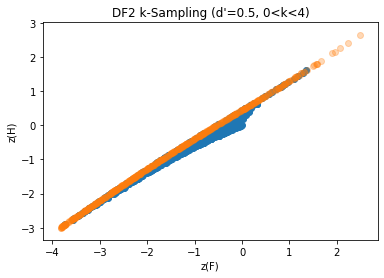

In [9]:
k_range = {'k_min': 0, 'k_max': 4, 'k_num': 1000}
zf_vals, zh_vals = diff_model.sample_k1_k2_values_to_z(k_range, 1, 500)
zf_vals_k, zh_vals_k = diff_model.sample_k_values_to_z(k_range, 1, 500)

plt.scatter(zf_vals, zh_vals)
plt.scatter(zf_vals_k, zh_vals_k, alpha=0.3)
plt.xlabel('z(F)')
plt.ylabel('z(H)')
plt.title('DF2 k-Sampling (d\'=0.5, 0<k<4)')
#plt.savefig('results/df2_sampling_smallk.png')

In [15]:
# DF1/DF2 k-sampling using subject slope-intercept data

k_range = {'k_min': 0, 'k_max': 4, 'k_num': 101}
dp_range = {'dp_min': 0, 'dp_max': 2, 'dp_num': 11}

mb_data = pd.read_csv('data/mb_data.csv', index_col=0)
x_vals = [-4, 3]

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zf_vals, zh_vals = diff_model.sample_k1_k2_values_to_z(k_range, dp, 500)
    zf_vals_k, zh_vals_k = diff_model.sample_k_values_to_z(k_range, dp, 500)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(zf_vals, zh_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black', label='DF2')
    plt.scatter(zf_vals_k, zh_vals_k, alpha=0.3, marker='s', facecolor="none", edgecolor='black', label='DF1')
    for index, row in mb_data.iterrows():
        slope, intercept = row['Slope'], row['Intercept']
        pred_vals = [slope * n + intercept for n in x_vals]
        plt.plot(x_vals, pred_vals, color='black', alpha=0.1)
    plt.xlabel('z(F)')
    plt.ylabel('z(H)')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.title(f'DF k-Value Sampling (d\'={round(dp,2)}, 0<k<4)')
    plt.legend()
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()

In [11]:
# DF2 k-sampling w/ subject z-value data

k_range = {'k_min': -4, 'k_max': 4, 'k_num': 201}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 26}

data = pd.read_csv('data/z_data.csv', index_col=0)
x_vals = [-4, 3]
explained_subs = ['BYZ','HP','HYP','SL','YPL','YJC','ZJT','QP','TCD','YCX','ZXL','ZY','CW','WJ','RSL','SJ2','LXL','SYB','WY','YJX','CY','GJ','JYN','SJ','SXQ','ZQT']

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zf_vals, zh_vals = diff_model.sample_k1_k2_values_to_z(k_range, dp, 1000)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(zf_vals, zh_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black')

    for i in range(len(data)):
        sub_data = data.iloc[i]
        if sub_data['Subject'] in explained_subs:
            alpha = 0.3
            zf_vals = sub_data.filter(like='ZF').tolist()
            zh_vals = sub_data.filter(like='ZH').tolist()
            plt.plot(zf_vals, zh_vals, color='black', alpha=alpha)    
    
    plt.xlabel('z(F)')
    plt.ylabel('z(H)')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.title(f'DF2 k-Value Sampling (d\'={round(dp,2)}, -4<k<4)')
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()


<Figure size 576x432 with 0 Axes>

In [18]:
# DF2 k-sampling w/ subject p-value data

k_range = {'k_min': 0, 'k_max': 4, 'k_num': 201}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 26}

data = pd.read_csv('data/p_data.csv', index_col=0)
x_vals = [-4, 3]
explained_subs = ['BYZ','HP','HYP','SL','YPL','YJC','ZJT','QP','TCD','YCX','ZXL','ZY','CW','WJ','RSL','SJ2','LXL','SYB','WY','YJX','CY','GJ','JYN','SJ','SXQ','ZQT']

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    pf_vals, ph_vals = diff_model.sample_k1_k2_values_to_p(k_range, dp, 1000)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(pf_vals, ph_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black')

    for i in range(len(data)):
        sub_data = data.iloc[i]
        if sub_data['Subject'].replace('\'', "") in explained_subs:
            alpha = 0.3
            pf_vals = sub_data.filter(like='PF').tolist()
            ph_vals = sub_data.filter(like='PH').tolist()
            plt.plot(pf_vals, ph_vals, color='black', alpha=alpha)    
    
    plt.xlabel('p(F)')
    plt.ylabel('p(H)')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title(f'DF2 k-Value Sampling (d\'={round(dp,2)}, -4<k<4)')
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()


<Figure size 576x432 with 0 Axes>

KeyboardInterrupt: 

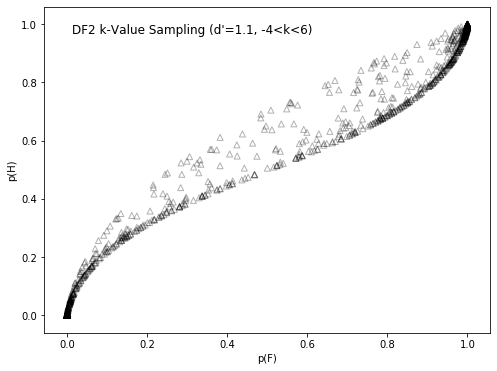

In [239]:
# DF2 k-sampling w/ subject p-value data

k_range = {'k_min': -4, 'k_max': 6, 'k_num': 501}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 26}

x_vals = [-4, 4]

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    pf_vals, ph_vals = diff_model.sample_k1_k2_values_to_p(k_range, dp, 1000)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(pf_vals, ph_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black')

    plt.xlabel('p(F)')
    plt.ylabel('p(H)')
    #plt.xlim(0, 1)
    #plt.ylim(0, 1)
    plt.title(f'DF2 k-Value Sampling (d\'={round(dp,2)}, -4<k<6)', x=0.6, y=0.9, ha='right')
    plt.savefig(f'results/output/k_sampling{round(dp,2)}.png')
    plt.clf()


# Fixed Parameter Plots

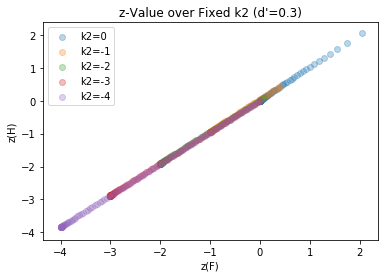

In [67]:
k1_range = {'k_min': 0, 'k_max': 5, 'k_num': 100}
data_zf = []
data_zh = []
for k2 in range(5):
    k_data_zf = []
    k_data_zh = []
    for k1 in np.linspace(k1_range['k_min'], k1_range['k_max'], k1_range['k_num']):
        zf,zh = diff_model.convert_k_to_z(0.3, k1, k2)
        k_data_zf.append(zf)
        k_data_zh.append(zh)
        
    data_zf.append(k_data_zf)
    data_zh.append(k_data_zh)

for i in range(len(data_zf)):
    plt.scatter(data_zf[i], data_zh[i], label=f'k2={-i}', alpha=0.3)
plt.xlabel('z(F)')
plt.ylabel('z(H)')
plt.title('z-Value over Fixed k2 (d\'=0.3)')
plt.legend()
plt.savefig('results/z_fixedk2_smalldp.png')

In [116]:
k1_range = {'k_min': 0, 'k_max': 4, 'k_num': 101}
dp_range = {'dp_min': 0, 'dp_max': 2, 'dp_num': 11}

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    data_zf = []
    data_zh = []
    for k2 in range(0, 5):
        k_data_zf = []
        k_data_zh = []
        for k1 in np.linspace(k1_range['k_min'], k1_range['k_max'], k1_range['k_num']):
            zf,zh = diff_model.convert_k_to_z(dp, k1, k2)
            k_data_zf.append(zf)
            k_data_zh.append(zh)
            
        k_data_zf = [n for n in k_data_zf if abs(n) != np.inf]
        k_data_zh = [n for n in k_data_zh if abs(n) != np.inf]
        data_zf.append(k_data_zf)
        data_zh.append(k_data_zh)

    for i in range(len(data_zf)):
        model = linregress(data_zf[i], data_zh[i])
        plt.scatter(data_zf[i], data_zh[i], alpha=0.3, label=f'k2={-i}: y={round(model.intercept,3)}+{round(model.slope, 3)}x')
    plt.gcf().set_size_inches(8, 6)
    plt.xlabel('z(F)')
    plt.ylabel('z(H)')
    plt.title(f'z-Value over Fixed d\' (d\'={round(dp,2)})')
    plt.legend()
    plt.savefig(f'results/z_fixeddp{round(dp,2)}.png')
    plt.clf()

<Figure size 576x432 with 0 Axes>

In [114]:
k1_range = {'k_min': 0, 'k_max': 5, 'k_num': 100}
dp_range = {'dp_min': 0, 'dp_max': 2, 'dp_num': 11}

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    data_pf = []
    data_ph = []
    for k2 in range(0, 5):
        k_data_pf = []
        k_data_ph = []
        for k1 in np.linspace(k1_range['k_min'], k1_range['k_max'], k1_range['k_num']):
            pf,ph = diff_model.convert_k_to_p(dp, k1, k2)
            k_data_pf.append(pf)
            k_data_ph.append(ph)
            
        k_data_pf = [n for n in k_data_pf if abs(n) != np.inf]
        k_data_ph = [n for n in k_data_ph if abs(n) != np.inf]
        data_pf.append(k_data_pf)
        data_ph.append(k_data_ph)

    for i in range(len(data_pf)):
        model = linregress(data_pf[i], data_ph[i])
        plt.scatter(data_pf[i], data_ph[i], alpha=0.3, label=f'k2={-i}: y={round(model.intercept,3)}+{round(model.slope, 3)}x')
    plt.gcf().set_size_inches(8, 6)
    plt.xlabel('p(F)')
    plt.ylabel('p(H)')
    plt.title(f'p-Value over Fixed d\' (d\'={round(dp,2)})')
    plt.legend()
    plt.savefig(f'results/p_fixeddp{round(dp,2)}.png')
    plt.clf()

<Figure size 576x432 with 0 Axes>

# DF2 Boundary Characterization
• http://blog.thehumangeo.com/2014/05/12/drawing-boundaries-in-python/ <br>
• https://stackoverflow.com/questions/16750618/whats-an-efficient-way-to-find-if-a-point-lies-in-the-convex-hull-of-a-point-cl <br>
• https://stackoverflow.com/questions/50549128/boundary-enclosing-a-given-set-of-points <br>

In [226]:
from shapely import geometry
from scipy.spatial import Delaunay
import numpy as np

def alpha_shape(points, alpha, only_outer=True):
    """
    Compute the alpha shape (concave hull) of a set of points.
    :param points: np.array of shape (n,2) points.
    :param alpha: alpha value.
    :param only_outer: boolean value to specify if we keep only the outer border
    or also inner edges.
    :return: set of (i,j) pairs representing edges of the alpha-shape. (i,j) are
    the indices in the points array.
    """
    assert points.shape[0] > 3, "Need at least four points"

    def add_edge(edges, i, j):
        """
        Add an edge between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges:
            # already added
            assert (j, i) in edges, "Can't go twice over same directed edge right?"
            if only_outer:
                # if both neighboring triangles are in shape, it's not a boundary edge
                edges.remove((j, i))
            return
        edges.add((i, j))

    try:
        tri = Delaunay(points)
    except:
        print('Shape too flat!')
        return set()
    edges = set()
    # Loop over triangles:
    # ia, ib, ic = indices of corner points of the triangle
    for ia, ib, ic in tri.vertices:
        pa = points[ia]
        pb = points[ib]
        pc = points[ic]
        # Computing radius of triangle circumcircle
        # www.mathalino.com/reviewer/derivation-of-formulas/derivation-of-formula-for-radius-of-circumcircle
        a = np.sqrt((pa[0] - pb[0]) ** 2 + (pa[1] - pb[1]) ** 2)
        b = np.sqrt((pb[0] - pc[0]) ** 2 + (pb[1] - pc[1]) ** 2)
        c = np.sqrt((pc[0] - pa[0]) ** 2 + (pc[1] - pa[1]) ** 2)
        s = (a + b + c) / 2.0
        area = np.sqrt(s * (s - a) * (s - b) * (s - c))
        circum_r = a * b * c / (4.0 * area)
        if circum_r < alpha:
            add_edge(edges, ia, ib)
            add_edge(edges, ib, ic)
            add_edge(edges, ic, ia)
    return edges

def find_edges_with(i, edge_set):
    i_first = [j for (x,j) in edge_set if x==i]
    i_second = [j for (j,x) in edge_set if x==i]
    return i_first,i_second

def stitch_boundaries(edges):
    edge_set = edges.copy()
    boundary_lst = []
    while len(edge_set) > 0:
        boundary = []
        edge0 = edge_set.pop()
        boundary.append(edge0)
        last_edge = edge0
        while len(edge_set) > 0:
            i,j = last_edge
            j_first, j_second = find_edges_with(j, edge_set)
            if j_first:
                edge_set.remove((j, j_first[0]))
                edge_with_j = (j, j_first[0])
                boundary.append(edge_with_j)
                last_edge = edge_with_j
            elif j_second:
                edge_set.remove((j_second[0], j))
                edge_with_j = (j, j_second[0])  # flip edge rep
                boundary.append(edge_with_j)
                last_edge = edge_with_j

            if edge0[0] == last_edge[1]:
                break

        boundary_lst.append(boundary)
    return boundary_lst

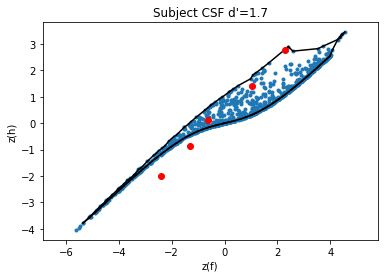

In [209]:
from matplotlib.pyplot import *

# Constructing the input point data
#k_range = {'k_min': -4, 'k_max': 6, 'k_num': 1000}
#zfm_vals, zhm_vals = diff_model.sample_k1_k2_values_to_z(k_range, 1.225, 500)
zfm_vals, zhm_vals = model_data[1.7000000000000002]
points = np.column_stack((zfm_vals, zhm_vals))

# Computing the alpha shape
edges = alpha_shape(np.column_stack((zfm_vals, zhm_vals)), alpha=0.5, only_outer=True)

# Plotting the output
figure()
axis('equal')
plot(points[:, 0], points[:, 1], '.')

for i, j in edges:
    plot(points[[i, j], 0], points[[i, j], 1], c='black')
    
z_sub_data = z_data.loc['CSF']
zf_vals = [n for n in z_sub_data.filter(like='ZF').tolist() if n != 0]
zh_vals = [n for n in z_sub_data.filter(like='ZH').tolist() if n != 0]
plt.scatter(zf_vals, zh_vals, c='r', zorder=10)
plt.xlabel('z(f)')
plt.ylabel('z(h)')
plt.title('Subject CSF d\'=1.7')
show()

In [265]:
k_range = {'k_min': -4, 'k_max': 6, 'k_num': 501}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 101}

df1_model_data = dict()

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zfm_vals, zhm_vals = diff_model.get_k_values_to_z(k_range, dp)
    zfm_vals_new = [zfm_vals[i] for i in range(len(zfm_vals)) if np.isfinite(zfm_vals)[i] and np.isfinite(zhm_vals)[i]]
    zhm_vals_new = [zhm_vals[i] for i in range(len(zhm_vals)) if np.isfinite(zfm_vals)[i] and np.isfinite(zhm_vals)[i]]
    zfm_vals, zhm_vals = zfm_vals_new, zhm_vals_new
                      
    df1_model_data[dp] = [zfm_vals, zhm_vals]
    
df1_p_model_data = {key: [[st.norm.cdf(z) for z in df1_model_data[key][0]], [st.norm.cdf(z) for z in df1_model_data[key][1]]] for key in df1_model_data}

In [266]:
k_range = {'k_min': -4, 'k_max': 6, 'k_num': 501}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 101}
num_of_pts = 1000

df2_model_data = dict()

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zfm_vals, zhm_vals = diff_model.sample_k1_k2_values_to_z(k_range, dp, num_of_pts)
    zfm_vals_new = [zfm_vals[i] for i in range(len(zfm_vals)) if np.isfinite(zfm_vals)[i] and np.isfinite(zhm_vals)[i]]
    zhm_vals_new = [zhm_vals[i] for i in range(len(zhm_vals)) if np.isfinite(zfm_vals)[i] and np.isfinite(zhm_vals)[i]]
    zfm_vals, zhm_vals = zfm_vals_new, zhm_vals_new
                      
    df2_model_data[dp] = [zfm_vals, zhm_vals]
    
df2_p_model_data = {key: [[st.norm.cdf(z) for z in df2_model_data[key][0]], [st.norm.cdf(z) for z in df2_model_data[key][1]]] for key in df2_model_data}


In [250]:
z_data = pd.read_csv('data/z_data.csv', index_col=1)
p_data = pd.read_csv('data/p_data.csv', index_col=1)
explained_subs = ['LY', 'YJZ', 'HZL', 'LJJ', 'CSF','LT','ZBY','DLC','HMH','GAX','LMT','PC','SZJ','WYX','ZJ']

alpha_value = 1

for subject in explained_subs:
    z_sub_data = z_data.loc[subject]
    zf_vals = [n for n in z_sub_data.filter(like='ZF').tolist() if n != 0]
    zh_vals = [n for n in z_sub_data.filter(like='ZH').tolist() if n != 0]
    
    best_dp = 0
    points_explained = 0
    for dp in df2_model_data.keys():
        
        if dp == 0:
            continue
        
        zfm_vals, zhm_vals = df2_model_data[dp]
        
        points = np.column_stack((zfm_vals, zhm_vals))
        edges = alpha_shape(points, alpha=alpha_value, only_outer=True)
        boundaries = stitch_boundaries(edges)[0]
        edge_pts = [points[pt[0]] for pt in boundaries]
        cloud = geometry.Polygon(edge_pts)
        
        num_explained = [cloud.contains(geometry.Point(zf, zh)) for zf, zh in zip(zf_vals, zh_vals)].count(True)
        
        if num_explained > points_explained:
            best_dp = dp
            points_explained = num_explained
        if num_explained == len(zf_vals):
            break
    
    print(f"{subject}: {points_explained} points explained with d\'={round(best_dp, 3)}")
    
    subject_acc = round(z_sub_data['Accuracy'], 3)
    model_acc = round((st.norm.cdf(best_dp/2))**2 + (st.norm.cdf(-best_dp/2))**2, 3)
    zfm_vals, zhm_vals = df2_model_data[best_dp]

    points = np.column_stack((zfm_vals, zhm_vals))
    edges = alpha_shape(points, alpha=alpha_value, only_outer=True)
    for i, j in edges:
        plt.plot(points[[i, j], 0], points[[i, j], 1], color='black')
    plt.gcf().set_size_inches(8, 6)
    plt.scatter(zfm_vals, zhm_vals, alpha=0.1, label='Model Cloud', color='black', marker='.')
    plt.scatter(zf_vals, zh_vals, label='Human Data', color='black', marker='s')
    plt.xlabel('z(F)')
    plt.ylabel('z(H)')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)                    
    plt.title(f'DF2 Model Against Subject {subject} (d\'={round(best_dp, 3)})\nSubject Accuracy: {subject_acc}    Model Accuracy: {model_acc}', x=0.35, y=0.88)
    plt.legend(loc=4)
    plt.savefig(f'results/output/df2_model_{subject}.png')
    plt.clf()
    

/Users/alexyu/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars
/Users/alexyu/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in sqrt


LY: 4 points explained with d'=0.675
YJZ: 5 points explained with d'=0.425
HZL: 5 points explained with d'=1.875
LJJ: 5 points explained with d'=2.025
CSF: 3 points explained with d'=1.7
LT: 3 points explained with d'=1.85
ZBY: 5 points explained with d'=1.6
DLC: 3 points explained with d'=0.6
HMH: 3 points explained with d'=0.65
GAX: 2 points explained with d'=0.3
LMT: 1 points explained with d'=0.625
PC: 2 points explained with d'=0.425
SZJ: 4 points explained with d'=1.025
WYX: 2 points explained with d'=0.65
ZJ: 3 points explained with d'=0.35


<Figure size 576x432 with 0 Axes>

In [270]:
z_data = pd.read_csv('data/z_data.csv', index_col=1)
p_data = pd.read_csv('data/p_data.csv', index_col=1)
explained_subs = ['CSF','LT','ZBY','DLC','HMH','GAX','LMT','PC','SZJ','WYX','ZJ']

alpha_value = 1

for subject in explained_subs:
    z_sub_data = z_data.loc[subject]
    zf_vals = [n for n in z_sub_data.filter(like='ZF').tolist() if n != 0]
    zh_vals = [n for n in z_sub_data.filter(like='ZH').tolist() if n != 0]
    pf_vals = [st.norm.cdf(z) for z in zf_vals]
    ph_vals = [st.norm.cdf(z) for z in zh_vals]
    
    odr_data = odrpack.RealData(zf_vals, zh_vals)
    odr = odrpack.ODR(odr_data, linear, beta0=[1., 1.])
    subject_slope, subject_intercept = odr.run().beta
    print(f'{subject} TLS slope: {subject_slope}')

    coef = [subject_slope, subject_intercept]
    
    lowest_tls = np.inf
    best_dp = 0
    for dp in df1_model_data.keys():
        zfm_vals, zhm_vals = df1_model_data[dp]
        zfm_vals_new = [zfm_vals[i] for i in range(len(zfm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
        zhm_vals_new = [zhm_vals[i] for i in range(len(zhm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
        zfm_vals, zhm_vals = zfm_vals_new, zhm_vals_new

        if len(zfm_vals) < 2:
            continue

        tls = np.sum([distance([f, h], coef) for f, h in zip(zfm_vals, zhm_vals)])

        if tls < lowest_tls:
            lowest_tls = tls
            best_dp = dp
    
    zfm_vals, zhm_vals = df2_model_data[best_dp]
    points = np.column_stack((zfm_vals, zhm_vals))
    edges = alpha_shape(points, alpha=alpha_value, only_outer=True)
    
    if len(edges) > 0:
        boundaries = stitch_boundaries(edges)[0]
        edge_pts = [points[pt[0]] for pt in boundaries]
        cloud = geometry.Polygon(edge_pts)
        points_explained = [cloud.contains(geometry.Point(zf, zh)) for zf, zh in zip(zf_vals, zh_vals)].count(True)

        print(f"{subject}: {points_explained} points explained with d\'={round(best_dp, 3)}")
    else:
        print(f"{subject}: No boundaries detected")
    
    plt.gcf().set_size_inches(8, 6)
    
    # Plot DF2 model cloud data
    subject_acc = round(z_sub_data['Accuracy'], 3)
    model_acc = round((st.norm.cdf(best_dp/2))**2 + (st.norm.cdf(-best_dp/2))**2, 3)
    plt.scatter(zfm_vals, zhm_vals, alpha=0.1, label='DF2 Model', color='black', marker='.')
    
    # Plot DF1 model cloud data
    zfm_vals, zhm_vals = diff_model.get_k_values_to_z(k_range, best_dp)
    zfm_vals_new = [zfm_vals[i] for i in range(len(zfm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
    zhm_vals_new = [zhm_vals[i] for i in range(len(zhm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
    zfm_vals, zhm_vals = zfm_vals_new, zhm_vals_new
    plt.plot(zfm_vals, zhm_vals, label='DF1 Model', color='black', linewidth=2)
    
    plt.scatter(zf_vals, zh_vals, label='Human Data', color='black', marker='s')
    plt.xlabel('z(F)')
    plt.ylabel('z(H)')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)                    
    plt.title(f'DF1 and DF2 Model Against Subject {subject} (d\'={round(best_dp, 3)})\nSubject Accuracy: {subject_acc}    Model Accuracy: {model_acc}', x=0.35, y=0.88)
    plt.legend(loc=4)
    plt.savefig(f'results/output/df2df1_model_{subject}.png')
    plt.clf()
    

CSF TLS slope: 1.0028619619006445
CSF: 0 points explained with d'=0.8
LT TLS slope: 0.905964790070835
LT: 2 points explained with d'=1.675
ZBY TLS slope: 0.8016524510555929
ZBY: 2 points explained with d'=1.5
DLC TLS slope: 1.0277976800645598
DLC: 0 points explained with d'=0.375
HMH TLS slope: 1.0062878358531209
HMH: 2 points explained with d'=0.475
GAX TLS slope: 1.1368243854933529
Shape too flat!
GAX: No boundaries detected
LMT TLS slope: 1.045244291738568
LMT: 0 points explained with d'=0.4
PC TLS slope: 0.9450103493481479
PC: 1 points explained with d'=0.325
SZJ TLS slope: 1.010588634237981
SZJ: 2 points explained with d'=0.675
WYX TLS slope: 1.16648171357917
Shape too flat!
WYX: No boundaries detected
ZJ TLS slope: 1.0048930538391838
ZJ: 0 points explained with d'=0.15


<Figure size 576x432 with 0 Axes>

CSF: 3 points explained with d'=1.675 w/ optimal DF2
CSF: 0 points explained with d'=0.8 w/ optimal DF1
CSF TLS slope: 1.0028619619006445

DLC: 3 points explained with d'=0.65 w/ optimal DF2
DLC: 0 points explained with d'=0.375 w/ optimal DF1
DLC TLS slope: 1.0277976800645598

GAX: 2 points explained with d'=0.25 w/ optimal DF2
Shape too flat!
GAX: No boundaries detected
GAX TLS slope: 1.1368243854933529

HMH: 3 points explained with d'=0.65 w/ optimal DF2
HMH: 2 points explained with d'=0.475 w/ optimal DF1
HMH TLS slope: 1.0062878358531209

LMT: 1 points explained with d'=0.2 w/ optimal DF2
LMT: 0 points explained with d'=0.4 w/ optimal DF1
LMT TLS slope: 1.045244291738568

LT: 3 points explained with d'=1.85 w/ optimal DF2
LT: 1 points explained with d'=1.675 w/ optimal DF1
LT TLS slope: 0.905964790070835

PC: 2 points explained with d'=0.4 w/ optimal DF2
PC: 1 points explained with d'=0.325 w/ optimal DF1
PC TLS slope: 0.9450103493481479

SZJ: 4 points explained with d'=0.9 w/ opt

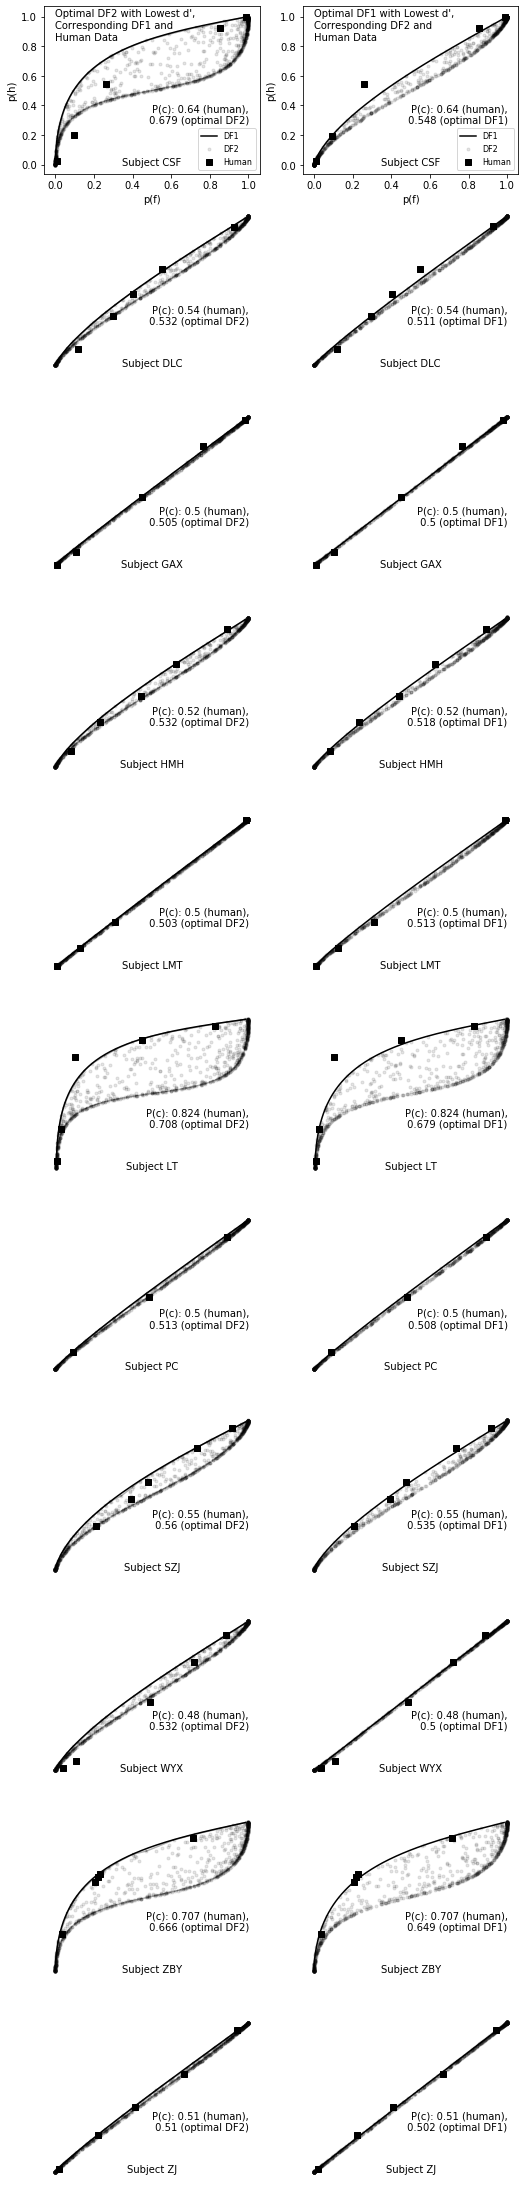

In [381]:
z_data = pd.read_csv('data/z_data.csv', index_col=1)
p_data = pd.read_csv('data/p_data.csv', index_col=1)
#explained_subs = ['LY', 'YJZ', 'HZL', 'LJJ', 'CSF','LT','ZBY','DLC','HMH','GAX','LMT','PC','SZJ','WYX','ZJ']
explained_subs = ['CSF','LT','ZBY','DLC','HMH','GAX','LMT','PC','SZJ','WYX','ZJ']
explained_subs.sort()

alpha_value = 0.25

count = 1
is_first = True
fig = plt.figure(figsize=(8.5, 40))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for subject in explained_subs:
    z_sub_data = z_data.loc[subject]
    zf_vals = [n for n in z_sub_data.filter(like='ZF').tolist() if n != 0]
    zh_vals = [n for n in z_sub_data.filter(like='ZH').tolist() if n != 0]
    pf_vals = [st.norm.cdf(z) for z in zf_vals]
    ph_vals = [st.norm.cdf(z) for z in zh_vals]
    
    '''
    Optimal DF2 w/ Corresponding DF1 and Human Data
    '''
    
    best_dp = 0
    points_explained = 0
    for dp in df2_model_data.keys():
        
        if dp == 0:
            continue
        
        pfm_vals, phm_vals = df2_p_model_data[dp]
        
        points = np.column_stack((pfm_vals, phm_vals))
        edges = alpha_shape(points, alpha=alpha_value, only_outer=True)
        boundaries = stitch_boundaries(edges)[0]
        edge_pts = [points[pt[0]] for pt in boundaries]
        cloud = geometry.Polygon(edge_pts)
        
        num_explained = [cloud.contains(geometry.Point(pf, ph)) for pf, ph in zip(pf_vals, ph_vals)].count(True)
        
        if num_explained > points_explained:
            best_dp = dp
            points_explained = num_explained
        if num_explained == len(pf_vals):
            break
    
    print(f"{subject}: {points_explained} points explained with d\'={round(best_dp, 3)} w/ optimal DF2")
    
    subject_acc = round(z_sub_data['Accuracy'], 3)
    model_acc = round((st.norm.cdf(best_dp/2))**2 + (st.norm.cdf(-best_dp/2))**2, 3)
    ax = fig.add_subplot(11, 2, count)
    
    pfm_vals, phm_vals = df2_p_model_data[best_dp]
    points = np.column_stack((pfm_vals, phm_vals))
    edges = alpha_shape(points, alpha=alpha_value, only_outer=True)
    for i, j in edges:
        ax.plot(points[[i, j], 0], points[[i, j], 1], alpha=0.3, color='black', zorder=1)
        
    ax.scatter(pfm_vals, phm_vals, alpha=0.1, label='DF2', color='black', marker='.')
    
    pfm_vals, phm_vals = df1_p_model_data[best_dp]
    ax.plot(pfm_vals, phm_vals, label='DF1', color='black')
    
    ax.scatter(pf_vals, ph_vals, label='Human', color='black', marker='s')
    ax.text(0.5, 0.05, f"Subject {subject}", transform=ax.transAxes, ha='center')
    ax.text(0.95, 0.3, f"P(c): {subject_acc} (human),\n {model_acc} (optimal DF2)", transform=ax.transAxes, ha='right')
    
    if is_first:
        ax.text(0.05, 0.8, 'Optimal DF2 with Lowest d\', \nCorresponding DF1 and \nHuman Data', transform=ax.transAxes, ha='left')
        ax.set_xlabel('p(f)')
        ax.set_ylabel('p(h)')
        ax.legend(loc=4, prop={'size': 8})
    else:
        ax.set_frame_on(False)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f'results/output/DF2_boundary_{subject}.svg', bbox_inches=extent)
    count += 1
    
    '''
    Optimal DF1 w/ Corresponding DF2 and Human Data
    '''
    
    odr_data = odrpack.RealData(zf_vals, zh_vals)
    odr = odrpack.ODR(odr_data, linear, beta0=[1., 1.])
    subject_slope, subject_intercept = odr.run().beta
    coef = [subject_slope, subject_intercept]
    
    lowest_tls = np.inf
    best_dp = 0
    for dp in df1_model_data.keys():
        zfm_vals, zhm_vals = df1_model_data[dp]
        zfm_vals_new = [zfm_vals[i] for i in range(len(zfm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
        zhm_vals_new = [zhm_vals[i] for i in range(len(zhm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
        zfm_vals, zhm_vals = zfm_vals_new, zhm_vals_new

        if len(zfm_vals) < 2:
            continue

        tls = np.sum([distance([f, h], coef) for f, h in zip(zfm_vals, zhm_vals)])

        if tls < lowest_tls:
            lowest_tls = tls
            best_dp = dp
    
    pfm_vals, phm_vals = df2_p_model_data[best_dp]
    points = np.column_stack((pfm_vals, phm_vals))
    edges = alpha_shape(points, alpha=alpha_value, only_outer=True)
    
    if len(edges) > 0:
        boundaries = stitch_boundaries(edges)[0]
        edge_pts = [points[pt[0]] for pt in boundaries]
        cloud = geometry.Polygon(edge_pts)
        points_explained = [cloud.contains(geometry.Point(pf, ph)) for pf, ph in zip(pf_vals, ph_vals)].count(True)

        print(f"{subject}: {points_explained} points explained with d\'={round(best_dp, 3)} w/ optimal DF1")
    else:
        print(f"{subject}: No boundaries detected")
    print(f'{subject} TLS slope: {subject_slope}')
    
    ax = fig.add_subplot(11, 2, count)
    
    # Plot DF2 model cloud data
    subject_acc = round(z_sub_data['Accuracy'], 3)
    model_acc = round((st.norm.cdf(best_dp/2))**2 + (st.norm.cdf(-best_dp/2))**2, 3)
    ax.scatter(pfm_vals, phm_vals, alpha=0.1, label='DF2', color='black', marker='.')
    
    # Plot DF1 model cloud data
    pfm_vals, phm_vals = df1_p_model_data[best_dp]
    ax.plot(pfm_vals, phm_vals, label='DF1', color='black')
    
    ax.scatter(pf_vals, ph_vals, label='Human', color='black', marker='s')              
    ax.text(0.5, 0.05, f"Subject {subject}", transform=ax.transAxes, ha='center')
    ax.text(0.95, 0.3, f"P(c): {subject_acc} (human),\n {model_acc} (optimal DF1)", transform=ax.transAxes, ha='right')
    
    if is_first:
        ax.text(0.05, 0.8, 'Optimal DF1 with Lowest d\', \nCorresponding DF2 and \nHuman Data', transform=ax.transAxes, ha='left')
        ax.set_xlabel('p(f)')
        ax.set_ylabel('p(h)')
        ax.legend(loc=4, prop={'size': 8})
        is_first = False
    else:
        ax.set_frame_on(False)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f'results/output/DF2_boundary_{subject}.svg', bbox_inches=extent)
    count += 1
    
    print()
    fig.savefig('results/DF2_boundary.pdf')
    

# Analyzing DF1 ROC Fit

In [213]:
def distance(point, coef):
    return abs((coef[0]*point[0])-point[1]+coef[1])/math.sqrt((coef[0]*coef[0])+1)

def p4(p1, p2, p3):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    dx, dy = x2-x1, y2-y1
    det = dx*dx + dy*dy
    a = (dy*(y3-y1)+dx*(x3-x1))/det
    return x1+a*dx, y1+a*dy

def f(B, x):
    return B[0]*x + B[1]
linear = odrpack.Model(f)

In [6]:
k_range = {'k_min': 0, 'k_max': 4, 'k_num': 201}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 101}

z_data = pd.read_csv('data/z_data.csv', index_col=0)
p_data = pd.read_csv('data/p_data.csv', index_col=0)
p_data['Subject'] = p_data['Subject'].str.replace('\'', '')
x_vals = [-5, 5]
explained_subs = ['CSF','LT','ZBY','DLC','HMH','GAX','LMT','PC','SZJ','WYX','ZJ']

for i in range(len(z_data)):
    
    z_sub_data = z_data.iloc[i]
    subject = z_sub_data['Subject'].replace('\'', "")

    if subject in explained_subs:    

        # Unpack subject data
        zf_vals = [n for n in z_sub_data.filter(like='ZF').tolist() if n != 0]
        zh_vals = [n for n in z_sub_data.filter(like='ZH').tolist() if n != 0]
        pf_vals = [st.norm.cdf(z) for z in zf_vals]
        ph_vals = [st.norm.cdf(z) for z in zh_vals]

        # Find subject TLS regression line
        odr_data = odrpack.RealData(zf_vals, zh_vals)
        odr = odrpack.ODR(odr_data, linear, beta0=[1., 1.])
        subject_slope, subject_intercept = odr.run().beta
        print(f'{subject} TLS slope: {subject_slope}')
        
        coef = [subject_slope, subject_intercept]
        
        # Find d' that yields closest fitting z-ROC
        lowest_tls = np.inf
        best_dp = 0
        for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
            zfm_vals, zhm_vals = diff_model.get_k_values_to_z(k_range, dp)
            zfm_vals_new = [zfm_vals[i] for i in range(len(zfm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
            zhm_vals_new = [zhm_vals[i] for i in range(len(zhm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
            zfm_vals, zhm_vals = zfm_vals_new, zhm_vals_new
            
            if len(zfm_vals) < 2:
                continue
            
            tls = np.sum([distance([f, h], coef) for f, h in zip(zfm_vals, zhm_vals)])

            if tls < lowest_tls:
                lowest_tls = tls
                best_dp = dp

        # Calculate R^2
        p1 = (-5, subject_intercept + subject_slope * -5)
        p2 = (5, subject_intercept + subject_slope * 5)
        zfm_vals, zhm_vals = diff_model.get_k_values_to_z(k_range, best_dp)
        zfm_vals_new = [zfm_vals[i] for i in range(len(zfm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
        zhm_vals_new = [zhm_vals[i] for i in range(len(zhm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
        zfm_vals, zhm_vals = zfm_vals_new, zhm_vals_new
        ssr = np.sum([(mx - p4(p1, p2, (mx, my))[0])**2 + (my - p4(p1, p2, (mx, my))[1])**2 for mx, my in zip(zfm_vals, zhm_vals)])
        sst = np.sum([(mx - np.mean(zfm_vals))**2 + (my - np.mean(zhm_vals))**2 for mx, my in zip(zfm_vals, zhm_vals)])
        r_squared = round(1 - ssr/sst, 3)
        
        print(f"TLS value: {lowest_tls}\tR^2: {r_squared}")
        
        # Plot z-ROC
        plt.gcf().set_size_inches(8, 6)
        y_pred = [subject_intercept + subject_slope * n for n in x_vals]
        plt.plot(zf_vals, zh_vals, color='black', label='Human Data')
        zfm_vals, zhm_vals = diff_model.get_k_values_to_z(k_range, best_dp)
        plt.plot(x_vals, y_pred, color='black', linestyle='--', alpha=0.2, label=f'Human ROC: y={round(subject_intercept, 3)}+{round(subject_slope, 3)}x')
        plt.plot(zfm_vals, zhm_vals, color='black', alpha=0.5, label='Model ROC')

        plt.xlabel('z(F)')
        plt.ylabel('z(H)')
        plt.xlim(-4, 4)
        plt.ylim(-4, 4)
        subject_acc = round(z_sub_data['Accuracy'], 3)
        model_acc = round((st.norm.cdf(best_dp/2))**2 + (st.norm.cdf(-best_dp/2))**2, 3)
        plt.title(f'DF1 Subject {subject} ROC Fitting (d\'={round(best_dp,3)})\nR^2={r_squared}\nSubject Accuracy: {subject_acc}    Model Accuracy: {model_acc}')
        plt.legend()
        plt.savefig(f'results/output/df1_zmodel_{subject}.png')
        plt.clf()
        
        # Plot p-ROC
        plt.gcf().set_size_inches(8, 6)
        plt.plot(pf_vals, ph_vals, color='black', label='Human Data')
        temp_x = np.linspace(-4, 4, 26)
        y_pred = [subject_intercept + subject_slope * n for n in temp_x]
        temp_x = [st.norm.cdf(val) for val in temp_x]
        y_pred = [st.norm.cdf(val) for val in y_pred]
        plt.plot(temp_x, y_pred, color='black', linestyle='--', alpha=0.2, label='Human ROC')
        pfm_vals, phm_vals = diff_model.get_k_values_to_p(k_range, best_dp)
        plt.plot(pfm_vals, phm_vals, color='black', alpha=0.5, label='Model ROC')
        
        plt.xlabel('p(F)')
        plt.ylabel('p(H)')
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.title(f'DF1 Subject {subject} ROC Fitting (d\'={round(best_dp,3)})\nR^2={r_squared}\nSubject Accuracy: {subject_acc}    Model Accuracy: {model_acc}')
        plt.legend()
        plt.savefig(f'results/output/df1_pmodel_{subject}.png')
        plt.clf()


CSF TLS slope: 1.0028619619006445
TLS value: 12.265607189379818	R^2: 0.996
LT TLS slope: 0.905964790070835
TLS value: 7.40585149095371	R^2: 0.998
ZBY TLS slope: 0.8016524510555929
TLS value: 1.5630520173557965	R^2: 1.0
DLC TLS slope: 1.0277976800645598
TLS value: 2.5742410931097552	R^2: 0.999
GAX TLS slope: 1.1368243854933529
TLS value: 28.958201301622204	R^2: 0.987
HMH TLS slope: 1.0062878358531209
TLS value: 2.9650937458944995	R^2: 0.999
LMT TLS slope: 1.045244291738568
TLS value: 14.282878785591631	R^2: 0.997
PC TLS slope: 0.9450103493481479
TLS value: 1.298816138709779	R^2: 1.0
SZJ TLS slope: 1.010588634237981
TLS value: 2.7393059169859355	R^2: 0.997
WYX TLS slope: 1.16648171357917
TLS value: 16.089746490061565	R^2: 0.985
ZJ TLS slope: 1.0048930538391838
TLS value: 1.2134311960497974	R^2: 1.0


<Figure size 576x432 with 0 Axes>